<a href="https://colab.research.google.com/github/Brothelmdzz/CMSC320-Final-Project/blob/main/FinalTutorial.0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the final project for CMSC320

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
from sklearn import linear_model

data = pd.read_excel('HateCrimeStat.xls')
data.head(15)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Bias,2015,2016,2017,2018,2019
0,Single-Bias Incidents,5818,6063,7106,7036,7103
1,Race/Ethnicity/Ancestry:,3310,3489,4131,4047,3963
2,Anti-White,613,720,741,762,666
3,Anti-Black or African American,1745,1739,2013,1943,1930
4,Anti-American Indian or Alaska Native,131,154,251,194,119
5,Anti-Asian,111,113,131,148,158
6,Anti-Native Hawaiian or Other Pacific Islander,4,9,16,20,21
7,"Anti-Multiple Races, Group",113,136,180,137,134
8,Anti-Arab,37,51,102,82,95
9,Anti-Hispanic or Latino,299,344,427,485,527


In [ ]:
# We will first calculate the percentage of racial bias incidents throughout the five years
data['Total'] = data[2015] + data[2016] + data[2017] + data[2018] + data[2019]

for x in range(2015, 2020):
  data['percentage of ' + str(x)] = data[x] / data[x][1]
data.head()

,Bias,2015,2016,2017,2018,2019,Total,percentage of 2015,percentage of 2016,percentage of 2017,percentage of 2018,percentage of 2019
0,Single-Bias Incidents,5818,6063,7106,7036,7103,33126,1.757704,1.737747,1.720165,1.738572,1.792329
1,Race/Ethnicity/Ancestry:,3310,3489,4131,4047,3963,18940,1.000000,1.000000,1.000000,1.000000,1.000000
2,Anti-White,613,720,741,762,666,3502,0.185196,0.206363,0.179375,0.188288,0.168055
3,Anti-Black or African American,1745,1739,2013,1943,1930,9370,0.527190,0.498424,0.487291,0.480109,0.487005
4,Anti-American Indian or Alaska Native,131,154,251,194,119,849,0.039577,0.044139,0.060760,0.047937,0.030028


In [ ]:
dataPerYear = data[['Bias', 'percentage of 2015', 'percentage of 2016', 'percentage of 2017', 'percentage of 2018', 'percentage of 2019']]
dataPerYear.head(10)

,Bias,percentage of 2015,percentage of 2016,percentage of 2017,percentage of 2018,percentage of 2019
0,Single-Bias Incidents,1.757704,1.737747,1.720165,1.738572,1.792329
1,Race/Ethnicity/Ancestry:,1.000000,1.000000,1.000000,1.000000,1.000000
2,Anti-White,0.185196,0.206363,0.179375,0.188288,0.168055
3,Anti-Black or African American,0.527190,0.498424,0.487291,0.480109,0.487005
4,Anti-American Indian or Alaska Native,0.039577,0.044139,0.060760,0.047937,0.030028
5,Anti-Asian,0.033535,0.032388,0.031711,0.036570,0.039869
6,Anti-Native Hawaiian or Other Pacific Islander,0.001208,0.002580,0.003873,0.004942,0.005299
7,"Anti-Multiple Races, Group",0.034139,0.038980,0.043573,0.033852,0.033813
8,Anti-Arab,0.011178,0.014617,0.024691,0.020262,0.023972
9,Anti-Hispanic or Latino,0.090332,0.098596,0.103365,0.119842,0.132980


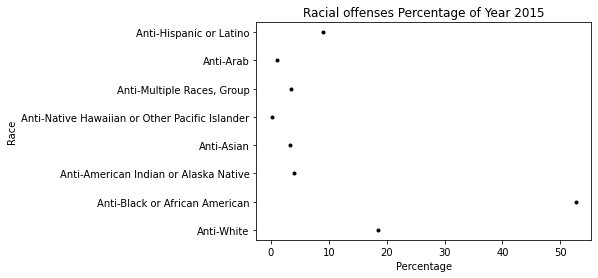

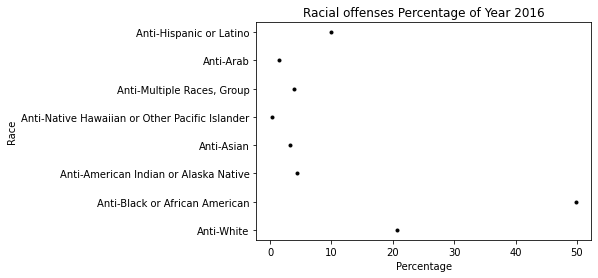

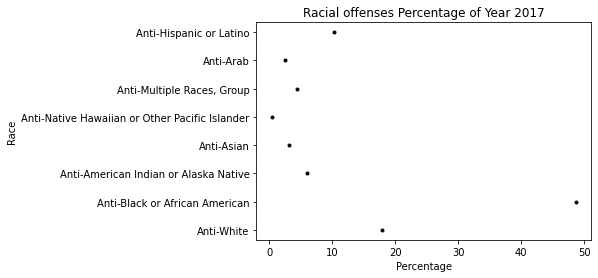

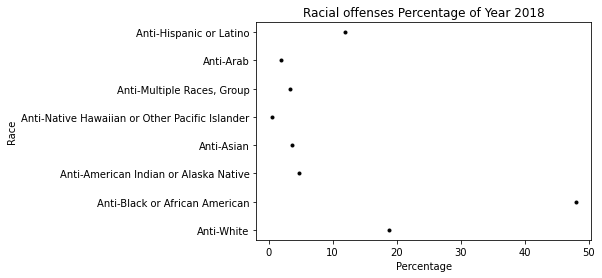

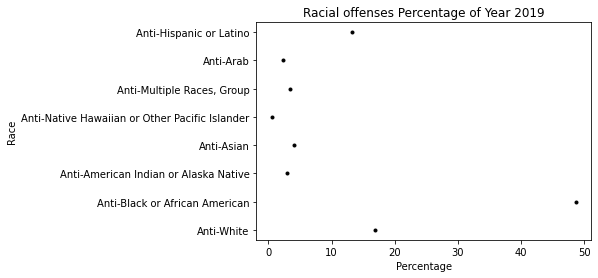

,Bias,2015,2016,2017,2018,2019
2,Anti-White,0.185196,0.206363,0.179375,0.188288,0.168055
3,Anti-Black or African American,0.527190,0.498424,0.487291,0.480109,0.487005
4,Anti-American Indian or Alaska Native,0.039577,0.044139,0.060760,0.047937,0.030028
5,Anti-Asian,0.033535,0.032388,0.031711,0.036570,0.039869
6,Anti-Native Hawaiian or Other Pacific Islander,0.001208,0.002580,0.003873,0.004942,0.005299
7,"Anti-Multiple Races, Group",0.034139,0.038980,0.043573,0.033852,0.033813
8,Anti-Arab,0.011178,0.014617,0.024691,0.020262,0.023972
9,Anti-Hispanic or Latino,0.090332,0.098596,0.103365,0.119842,0.132980


In [ ]:
dataRace = dataPerYear[2:10]
dataRace.columns = ['Bias' , 2015, 2016, 2017, 2018, 2019]
for x in range(2015, 2020):
  plt.plot(dataRace[x] * 100, dataRace['Bias'], 'k.')
  plt.title("Racial offenses Percentage of Year " + str(x))
  plt.xlabel("Percentage")
  plt.ylabel("Race")
  plt.show()
dataRace 

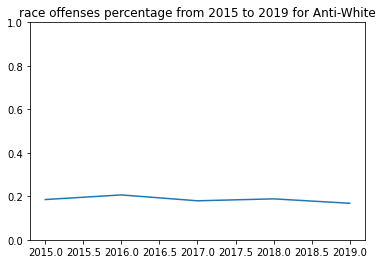

Statistics for Anti-White
coefficient of determination:  0.34924547882879864
slope:  [-0.0052359]


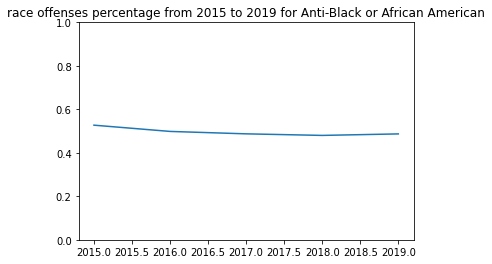

Statistics for Anti-Black or African American
coefficient of determination:  0.7016513123282777
slope:  [-0.0098686]


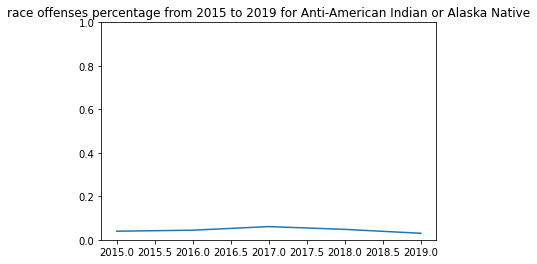

Statistics for Anti-American Indian or Alaska Native
coefficient of determination:  0.04590205075817444
slope:  [-0.00153005]


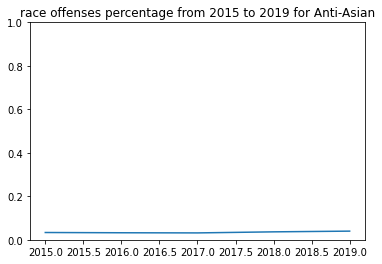

Statistics for Anti-Asian
coefficient of determination:  0.620177327782031
slope:  [0.00168509]


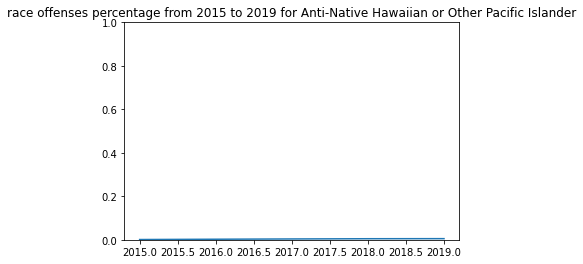

Statistics for Anti-Native Hawaiian or Other Pacific Islander
coefficient of determination:  0.9648997626482093
slope:  [0.00105435]


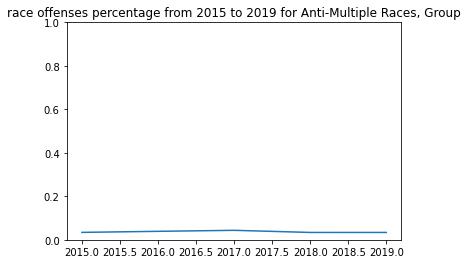

Statistics for Anti-Multiple Races, Group
coefficient of determination:  0.04436866007337348
slope:  [-0.00057798]


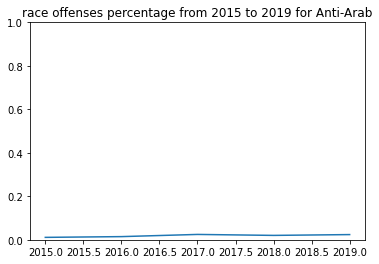

Statistics for Anti-Arab
coefficient of determination:  0.7013603453242839
slope:  [0.00312315]


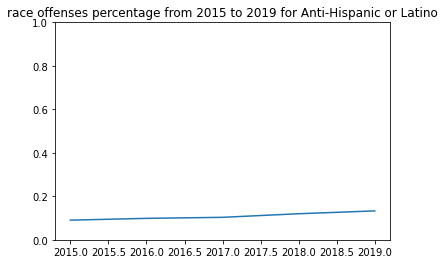

Statistics for Anti-Hispanic or Latino
coefficient of determination:  0.9610849290698682
slope:  [0.01065418]


In [ ]:

for x in range(0,8):
  plt.plot(dataRace.iloc[x][1:])
  plt.title("race offenses percentage from 2015 to 2019 for " + dataRace.iloc[x]['Bias'])
  plt.ylim((0,1))
  plt.show()
  y = np.array([2015,2016,2017,2018,2019]).reshape(-1,1)
  z = np.array(dataRace.iloc[x][1:])
  model = linear_model.LinearRegression()
  model = model.fit(y,z)  
  print("Statistics for " + dataRace.iloc[x]['Bias'])
  print("coefficient of determination: " , str(model.score(y,z)))
  print("slope: " , model.coef_)

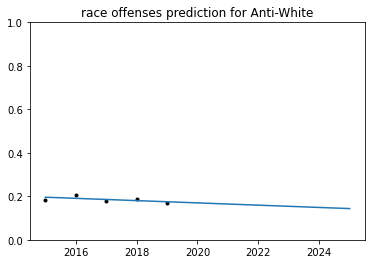

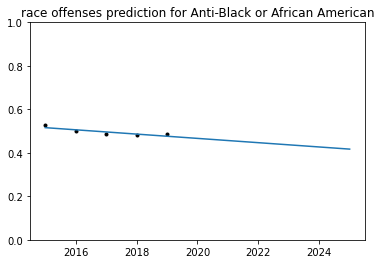

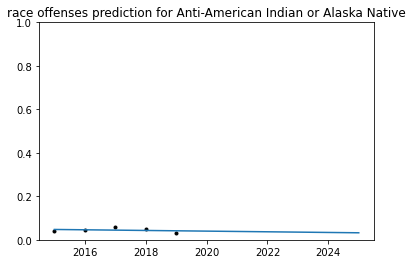

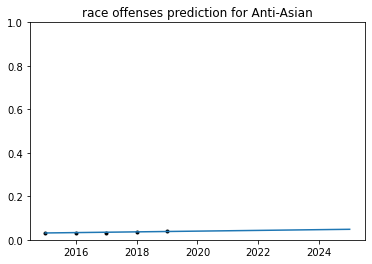

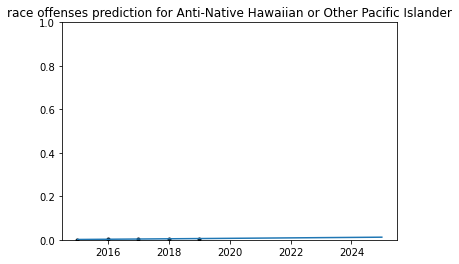

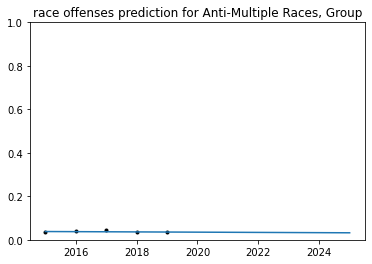

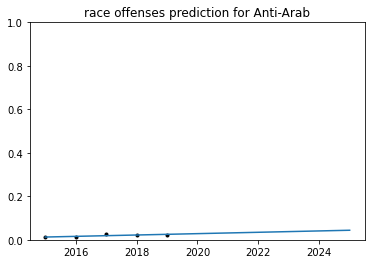

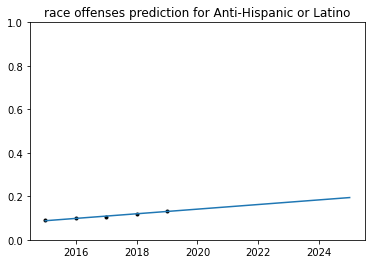

In [ ]:
for x in range(0,8):
  y = np.array([2015,2016,2017,2018,2019]).reshape(-1, 1)
  z = np.array(dataRace.iloc[x][1:])
  model = linear_model.LinearRegression()
  model = model.fit(y,z)  
  predict = np.array([2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025]).reshape(-1, 1)
  plt.title("race offenses prediction for " + dataRace.iloc[x]['Bias'])
  plt.plot(y, z, 'k.')
  plt.plot(predict, model.predict(predict))
  plt.ylim((0, 1))
  plt.show()
